In [1]:
import os
import sys
from pathlib import Path
path = str(Path(os.getcwd()))
# sys.path.insert(1, path+'/amazon-braket-community-detection/src')

In [2]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from geopy.distance import geodesic
import networkx as nx

df = pd.read_csv(path+'/database/Peninsula_pp.csv', delimiter=',', skiprows=0)
df

,Number,name,capacity(MW),latitude,longitude,primary_fuel,estimated_generation_gwh,Estimated cost for 1 year
0,1,Bukit Palong Solar Power Plant,3.0,2.5823,101.8313,Solar,2.419183,2.935532e+05
1,2,Gebeng Solar Power Plant,10.0,3.9924,103.3682,Solar,8.063943,9.785106e+05
2,3,Gemas Solar Power Plant,10.2,2.5956,102.6216,Solar,8.225222,9.980809e+05
3,4,Hijau Solar Power Plant,8.0,2.3409,102.2168,Solar,6.451155,7.828085e+05
4,5,Jasin,50.0,2.3400,102.3500,Solar,40.319716,4.892553e+06
5,6,Kuala Langat,50.0,2.7450,101.5600,Solar,40.319716,4.892553e+06
6,7,Kuala Lumpur Airport Solar Power Plant,19.0,2.7791,101.7144,Solar,15.321492,1.859170e+06
7,8,Kuala Perlis Solar Power Plant,6.0,6.4105,100.1378,Solar,4.838366,5.871064e+05
8,9,Kuala Sawah Solar Power Plant,5.3,2.6355,101.9404,Solar,4.273890,5.186106e+05
9,10,Merchang,50.0,4.9340,103.3360,Solar,40.319716,4.892553e+06


In [3]:
ind = df['Number']
name = df['name']
lat = df['latitude']
long = df['longitude']
capacity = df['capacity(MW)']
penetration = df['Estimated cost for 1 year']

In [4]:
locations = {ind: (lat, long) for ind, lat, long in zip(ind, lat, long)}
locations

{1: (2.5823, 101.8313),
 2: (3.9924, 103.3682),
 3: (2.5956, 102.6216),
 4: (2.3409, 102.2168),
 5: (2.34, 102.35),
 6: (2.745, 101.56),
 7: (2.7791, 101.7144),
 8: (6.4105, 100.1378),
 9: (2.6355, 101.9404),
 10: (4.934, 103.336),
 12: (2.8357, 101.8488),
 13: (1.4721, 103.3925),
 14: (2.715, 101.75)}

In [5]:
(len(locations.keys()))

13

In [6]:

# noconsumers = 10
# c_energy = np.random.default_rng().normal(loc=np.average(capacity), scale=np.std(capacity)/2, size=noconsumers)
# # c_energy = np.random.default_rng().integers(low=min(capacity), high=max(capacity), size=10)
# c_energy

In [7]:
def calculate_distance_mgpp(mglat, mglong, pplat, pplong):    
    distance_matrix = np.zeros(len(pplat))
    for i in range(len(pplat)):
        distance_matrix[i] = geodesic((mglat, mglong), (pplat[i], pplong[i])).km
    return distance_matrix


In [8]:
def calculate_distance_mgmg(mglat, mglong):    
    distance_matrix = np.zeros((len(mglat), len(mglat)))
    for i in range(len(mglat)):
        for j in range(len(mglat)):
            if i < j:
                distance_matrix[i][j] = geodesic((mglat[i], mglong[i]), (mglat[j], mglong[j])).km
    return distance_matrix

In [9]:
# def create_transmission_network(locations, distance_matrix, threshold=45):
#     G = nx.Graph()
#     for i, label_i in enumerate(locations.keys()):
#         for j, label_j in enumerate(locations.keys()):
#             if i < j:
#                 if distance_matrix[i][j] < threshold: # Only add edge if distance is below threshold
#                     G.add_edge(label_i, label_j)
#     return G

In [10]:
print(enumerate(locations.keys()))

In [11]:
# distance_matrix = calculate_distance_matrix(lat, long)

# # Create Graph Based on Distance Threshold
# G = create_transmission_network(locations, distance_matrix, threshold=45)

# # Visualize Graph
# fig, ax = plt.subplots()
# pos = {label: (lon, lat) for label, (lat, lon) in locations.items()}
# nx.draw(G, pos, ax=ax, node_size=100, node_color='blue')
# # nx.draw(G, pos, ax=ax, node_size=800, with_labels=True)
# # with_labels=True, node_color='lightblue', node_size=800)
# plt.title("Solar Panel Proximity Graph")
# plt.show()

In [12]:
# total_nodes = len(G.nodes(data=True))
# total_edges = len(G.edges(data=True))

In [13]:
import scipy.sparse as sp
from networkx.algorithms import community

### create QUBO matrix
# define the distance matrix
num_powerplants = (len(locations.keys())) ## number of solar power plants
pplat, pplong = zip(*locations.values())

In [14]:
# generate choices for microgrid locations
num_microgrids = 5 ## number of microgrids
random = np.random.default_rng(seed=45)
random_lat = random.uniform(min(lat), max(lat), size=4*num_microgrids)
lat_choices = random.choice(random_lat, size=num_microgrids, replace=False)

random_long = random.uniform(min(long), max(long), size=4*num_microgrids)
long_choices = random.choice(random_long, size=num_microgrids, replace=False)

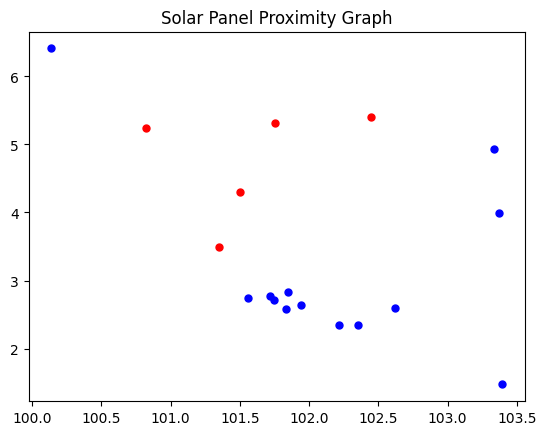

In [15]:
# Visualize Graph
fig, ax = plt.subplots()
ax.plot(long, lat, 'o', markersize=5, color='blue')
ax.plot(long_choices, lat_choices, 'o', markersize=5, color='red')
plt.title("Solar Panel Proximity Graph")
plt.show()

In [16]:
mgpp_distance = np.zeros(num_microgrids)
for i in range(num_microgrids):
    mgpp_distance[i] = np.sum(calculate_distance_mgpp(lat_choices[i], long_choices[i],pplat, pplong))
mgpp_distance

array([2260.49954445, 3808.23966157, 3854.7614119 , 2843.70812895,
       4118.89200122])

In [17]:
mgmg_distance = calculate_distance_mgmg(lat_choices, long_choices)
mgmg_distance

array([[  0.        , 207.21760997, 244.03391925,  91.42159821,
        202.64666019],
       [  0.        ,   0.        ,  77.8520179 , 115.8657074 ,
        103.21273445],
       [  0.        ,   0.        ,   0.        , 160.55476875,
        181.03576998],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        128.64508345],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [18]:
costCoeff = 10000
mgpp_cost = mgpp_distance * costCoeff
mgmg_cost = mgmg_distance * costCoeff

battery_cost = 38000  # Example fixed cost for battery and inverter installation
land_cost = 13000  # Example fixed cost for land acquisition
fixedCost = battery_cost + land_cost

In [19]:
def add_count_constraint(K, delta, N):
    """
    Adds a count constraint penalty to QUBO: (sum x_i - K)^2
    Args:
        Q: dict of QUBO terms (modified in-place)
        K: number of locations to select
        delta: penalty strength
        N: total number of candidate locations
    """
    Q = np.zeros((N, N))
    for i in range(N):
        Q[(i, i)] += delta * (1 - 2 * K)
        for j in range(i + 1, N):
            Q[(i, j)] += 2 * delta
    return Q


In [20]:
## budget constraint
panaltyTerm = add_count_constraint(5, 100000, num_microgrids)
panaltyTerm


array([[-900000.,  200000.,  200000.,  200000.,  200000.],
       [      0., -900000.,  200000.,  200000.,  200000.],
       [      0.,       0., -900000.,  200000.,  200000.],
       [      0.,       0.,       0., -900000.,  200000.],
       [      0.,       0.,       0.,       0., -900000.]])

In [21]:
mgpp_cost

array([22604995.44446766, 38082396.61573182, 38547614.11904076,
       28437081.28948206, 41188920.01221374])

In [22]:
np.average(np.array(penetration))

1742501.6365846156

In [23]:
sum(np.array(penetration))

22652521.2756

In [24]:
### QUBO matrix
term1 = (fixedCost*np.ones((1, num_microgrids))) - (sum(np.array(penetration)))*np.ones((1, num_microgrids)) + mgpp_cost
linearTerm = np.zeros((num_microgrids, num_microgrids))
for i in range(num_microgrids):
    linearTerm[i,i] = term1[0,i]
quandTerm = mgmg_cost

qubo_matrix = linearTerm + quandTerm + panaltyTerm

In [25]:
qubo_matrix

array([[ -896525.83113234,  2272176.09971071,  2640339.19246615,
         1114215.98209531,  2226466.60194067],
       [       0.        , 14580875.34013182,   978520.17895724,
         1358657.07403534,  1232127.34454473],
       [       0.        ,        0.        , 15046092.84344076,
         1805547.68752224,  2010357.6997879 ],
       [       0.        ,        0.        ,        0.        ,
         4935560.01388206,  1486450.83451591],
       [       0.        ,        0.        ,        0.        ,
               0.        , 17687398.73661374]])

In [26]:
from autoqubo import SamplingCompiler, Utils
import timeit

In [ ]:
start = timeit.default_timer()

solutions, energy_values = Utils.solve(qubo_matrix)

stop = timeit.default_timer()
print('Time: ', stop - start)

In [ ]:
for s, e in zip(solutions, energy_values):
    print(f"x={s}, energy={e}")

In [ ]:
sum(solutions[0])

In [27]:
from gurobi_optimods.qubo import solve_qubo


start = timeit.default_timer()

result = solve_qubo(qubo_matrix)

stop = timeit.default_timer()
print('Time: ', stop - start)

New QUBO solution found with objective 0.0
New QUBO solution found with objective -896525.8311323412
Time:  0.03354875004151836


In [28]:
result

QuboResult(solution=array([1., 0., 0., 0., 0.]), objective_value=-896525.8311323412)

In [29]:
sum(result.solution)

1.0

In [30]:
result.solution == solutions[0]

NameError: name 'solutions' is not defined

## qiskit

In [31]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np
from scipy.optimize import minimize
from collections import defaultdict
from typing import Sequence
 
 
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler


In [32]:
from qiskit import QuantumCircuit
qiskit_circuit = QuantumCircuit(num_microgrids + 1)


In [33]:
def build_qubo_paulis(qubo):
    pauli_list = []
    for i in range(num_microgrids):
        for j in range(num_microgrids):
            if i == j:
                pauli_list.append(("Z", [i], (-1)*sum([qubo[i][j]+qubo[i][i] for j in range(num_microgrids)])))
            else:
                pauli_list.append(("ZZ", [i, j], qubo[i][j]))
    return pauli_list
    # for edge in list(graph.edge_list()):
    #     weight = graph.get_edge_data(edge[0], edge[1])
    #     pauli_list.append(("ZZ", [edge[0], edge[1]], weight))
    # return pauli_list
 
qubo_paulis = build_qubo_paulis(qubo_matrix)
cost_hamiltonian = SparsePauliOp.from_sparse_list(qubo_paulis, num_microgrids)
print("Cost Function Hamiltonian:", cost_hamiltonian)

Cost Function Hamiltonian: SparsePauliOp(['IIIIZ', 'IIIZZ', 'IIZIZ', 'IZIIZ', 'ZIIIZ', 'IIIZZ', 'IIIZI', 'IIZZI', 'IZIZI', 'ZIIZI', 'IIZIZ', 'IIZZI', 'IIZII', 'IZZII', 'ZIZII', 'IZIIZ', 'IZIZI', 'IZZII', 'IZIII', 'ZZIII', 'ZIIIZ', 'ZIIZI', 'ZIZII', 'ZZIII', 'ZIIII'],
              coeffs=[-2.87404289e+06+0.j,  2.27217610e+06+0.j,  2.64033919e+06+0.j,
  1.11421598e+06+0.j,  2.22646660e+06+0.j,  0.00000000e+00+0.j,
 -9.10545566e+07+0.j,  9.78520179e+05+0.j,  1.35865707e+06+0.j,
  1.23212734e+06+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
 -9.40924624e+07+0.j,  1.80554769e+06+0.j,  2.01035770e+06+0.j,
  0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
 -3.10998109e+07+0.j,  1.48645083e+06+0.j,  0.00000000e+00+0.j,
  0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
 -1.06124392e+08+0.j])


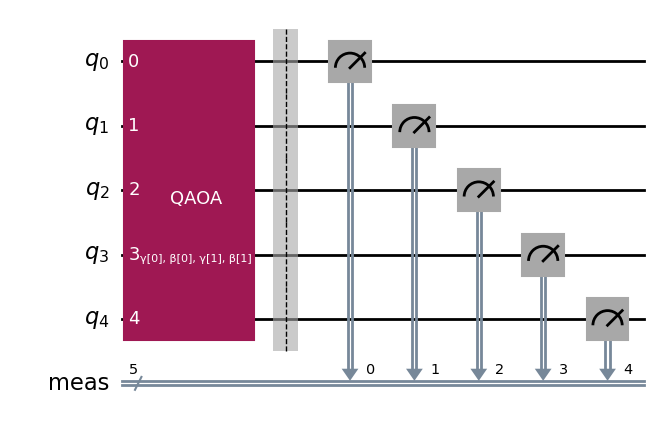

In [34]:
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()
 
circuit.draw("mpl")

In [35]:
# decomposed = circuit.decompose().decompose().decompose()
# from qiskit.qasm3 import dumps

# decomposed_qasm_string = dumps(decomposed)

In [36]:
# import qbraid 
# provider = qbraid.QbraidProvider()
# aws_device_id = "aws_sv1"
# device = provider.get_device(aws_device_id)
# device

In [37]:
qiskit_sim = AerSimulator()

In [38]:
estimator = Estimator(qiskit_sim)

AerSimulator('aer_simulator')


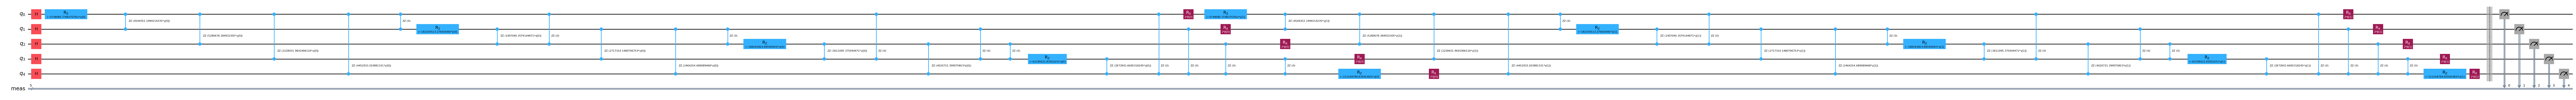

In [39]:
# service = QiskitRuntimeService()
backend = qiskit_sim
print(backend)
 
# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
 
candidate_circuit = pm.run(circuit)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [40]:
initial_gamma = np.pi
initial_beta = np.pi / 2
init_params = [initial_beta, initial_beta, initial_gamma, initial_gamma]

In [41]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)
 
    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])
 
    results = job.result()[0]
    cost = results.data.evs
 
    objective_func_vals.append(cost)
 
    return cost

In [42]:
objective_func_vals = []  # Global variable
with Session(backend=backend) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 50000
 
    # Set simple error suppression/mitigation options
    estimator.options.dynamical_decoupling.enable = True
    estimator.options.dynamical_decoupling.sequence_type = "XY4"
    estimator.options.twirling.enable_gates = True
    estimator.options.twirling.num_randomizations = "auto"
 
    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        # method="dogleg",
        tol=1e-2
    )
    print(result)

/Users/treerat/Documents/2025Quantathon/QRenew/.venv/lib/python3.11/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:269: UserWarning: Options {'dynamical_decoupling': {'enable': True, 'sequence_type': 'XY4'}, 'twirling': {'enable_gates': True, 'num_randomizations': 'auto'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -35494524.82165265
       x: [ 1.538e+00  2.558e+00  3.093e+00  4.222e+00]
    nfev: 17
   maxcv: 0.0


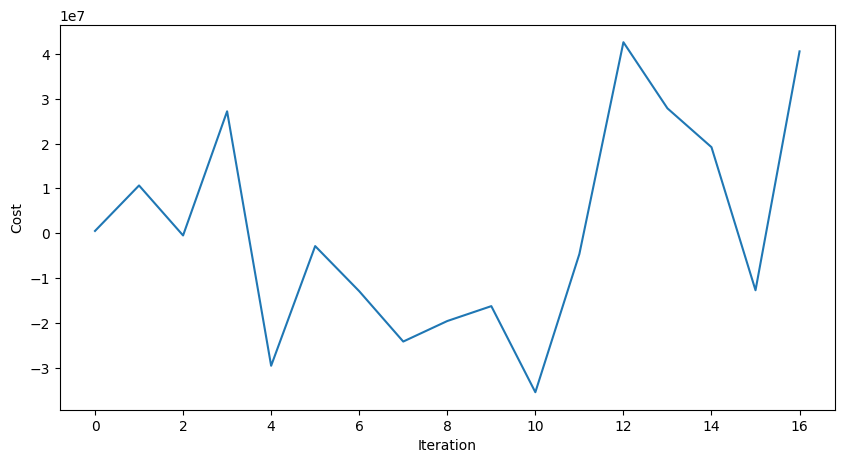

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

In [44]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)

# optimized_circuit.draw("mpl", fold=False, idle_wires=False)

In [45]:
job = qiskit_sim.run(optimized_circuit, shots=int(1e4))
job.result()

Result(backend_name='aer_simulator', backend_version='0.17.1', job_id='fbe1de03-94fa-4f25-9920-c57f5724001e', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1e': 22, '0x3': 20, '0x1f': 104, '0x8': 23, '0x1c': 429, '0x0': 992, '0x2': 379, '0x18': 653, '0xe': 36, '0x13': 152, '0x17': 286, '0xd': 207, '0xf': 177, '0x14': 630, '0x11': 197, '0xa': 959, '0x16': 555, '0x1a': 425, '0x1': 299, '0xc': 105, '0x4': 303, '0x12': 252, '0xb': 125, '0x9': 20, '0x1b': 134, '0x15': 153, '0x5': 412, '0x10': 1040, '0x19': 773, '0x6': 24, '0x1d': 114}), header={'creg_sizes': [['meas', 5]], 'global_phase': 0.0, 'memory_slots': 5, 'n_qubits': 5, 'name': 'QAOA-244', 'qreg_sizes': [['q', 5]], 'metadata': {}}, status=DONE, seed_simulator=3995712417, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.0026105, 'noise': 'ideal', 'batched_shots_optimization':

In [46]:
{bin(int(k, 16)): v for k, v in job.result().results[0].data.counts.items()}

{'0b11110': 22,
 '0b11': 20,
 '0b11111': 104,
 '0b1000': 23,
 '0b11100': 429,
 '0b0': 992,
 '0b10': 379,
 '0b11000': 653,
 '0b1110': 36,
 '0b10011': 152,
 '0b10111': 286,
 '0b1101': 207,
 '0b1111': 177,
 '0b10100': 630,
 '0b10001': 197,
 '0b1010': 959,
 '0b10110': 555,
 '0b11010': 425,
 '0b1': 299,
 '0b1100': 105,
 '0b100': 303,
 '0b10010': 252,
 '0b1011': 125,
 '0b1001': 20,
 '0b11011': 134,
 '0b10101': 153,
 '0b101': 412,
 '0b10000': 1040,
 '0b11001': 773,
 '0b110': 24,
 '0b11101': 114}

In [ ]:
int("0x3", 16)

In [ ]:
# #If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
# sampler = Sampler(mode=backend)
# sampler.options.default_shots = 10000

# # Set simple error suppression/mitigation options
# sampler.options.dynamical_decoupling.enable = True
# sampler.options.dynamical_decoupling.sequence_type = "XY4"
# sampler.options.twirling.enable_gates = True
# sampler.options.twirling.num_randomizations = "auto"

job = qiskit_sim.run(optimized_circuit, shots=int(1e4))
# counts_int = job.result().data.get_int_counts()
# counts_bin = job.result()
# print(counts_bin.data)
# shots = sum(counts_int.values())
# final_distribution_int = {key: val / shots for key, val in counts_int.items()}
# final_distribution_bin = {key: val / shots for key, val in counts_bin.items()}
# print(final_distribution_int)

In [ ]:
# qasm_3 = transpile(circuit.decompose(), 'qasm3')
# print(qasm_3)

braket_job = device.run(decomposed_qasm_string, shots=10)
braket_job.status()